# Importing needed libraries

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Loading the data in a variable

In [3]:
data = pd.read_csv('phone.csv')

In [5]:
data.head(4)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3


# Checking for null values

In [7]:
data.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

The data has no null values

In [11]:
descriptive_stats = data.describe()
descriptive_stats


,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


# descriptive analysis of the dataset:

App Usage Time (min/day):
Mean: 271.13 minutes
Minimum: 30 minutes
Maximum: 598 minutes
Standard Deviation: 177.20 minutes

- Screen On Time (hours/day):
Mean: 5.27 hours
Minimum: 1 hour
Maximum: 12 hours
Standard Deviation: 3.07 hours

- Battery Drain (mAh/day):
Mean: 1525.16 mAh
Minimum: 302 mAh
Maximum: 2993 mAh
Standard Deviation: 819.14 mAh

- Number of Apps Installed:
Mean: 50.68 apps
Minimum: 10 apps
Maximum: 99 apps
Standard Deviation: 26.94 apps

- Data Usage (MB/day):
Mean: 929.74 MB
Minimum: 102 MB
Maximum: 2497 MB
Standard Deviation: 640.45 MB

- Age:
Mean: 38.48 years
Minimum: 18 years
Maximum: 59 years
Standard Deviation: 12.01 years

- User Behavior Class (1 to 5 scale):
Mean: 2.99
Minimum: 1
Maximum: 5
Standard Deviation: 1.40

# Correlation Analysis

In [17]:
# ploting the correlation matrix
numerical_df = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()

In [19]:
correlation_matrix

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
User ID,1.000000,-0.024957,-0.014287,-0.019377,-0.023914,-0.014527,0.045188,-0.016242
App Usage Time (min/day),-0.024957,1.000000,0.950333,0.956385,0.955253,0.942308,0.004382,0.970498
Screen On Time (hours/day),-0.014287,0.950333,1.000000,0.948983,0.946975,0.941322,0.017232,0.964581
Battery Drain (mAh/day),-0.019377,0.956385,0.948983,1.000000,0.961853,0.932276,-0.002722,0.978587
Number of Apps Installed,-0.023914,0.955253,0.946975,0.961853,1.000000,0.934800,0.004034,0.981255
Data Usage (MB/day),-0.014527,0.942308,0.941322,0.932276,0.934800,1.000000,0.003999,0.946734
Age,0.045188,0.004382,0.017232,-0.002722,0.004034,0.003999,1.000000,-0.000563
User Behavior Class,-0.016242,0.970498,0.964581,0.978587,0.981255,0.946734,-0.000563,1.000000


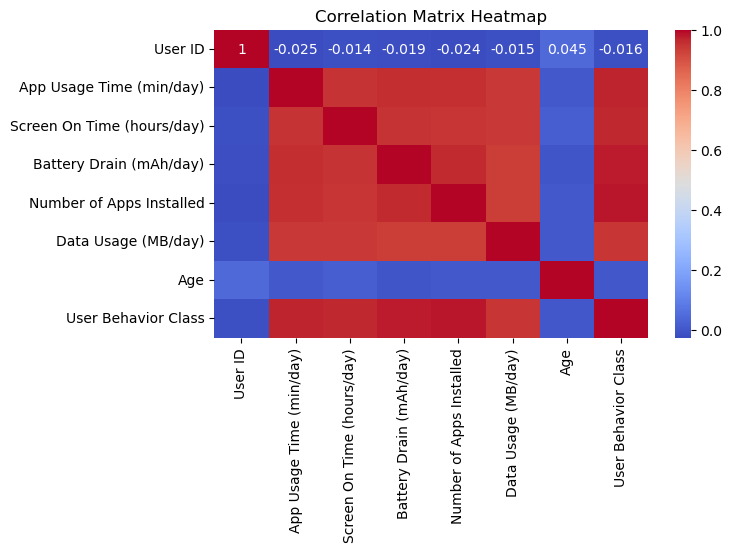

In [25]:
plt.figure(figsize=(7, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

Diagonal (User ID to User Behavior Class):

Each variable correlates perfectly with itself, resulting in a correlation of 1.0, which is why you see red squares along the diagonal.
Strong Positive Correlations (Closer to +1, Dark Red):

Screen On Time (hours/day) and Battery Drain (mAh/day) show a strong positive correlation, as indicated by the dark red square. This means that as screen on time increases, battery drain tends to increase as well.
App Usage Time (min/day) and Screen On Time (hours/day) also show a strong correlation, meaning that users who spend more time using apps tend to keep their screens on for longer.
Weak Positive Correlations:

Data Usage (MB/day) and Battery Drain (mAh/day) show a moderate positive correlation, meaning users who consume more data tend to drain more battery.
Age and User Behavior Class show some correlation, suggesting a possible relationship between age and the assigned user behavior classification, though it appears weak.
Weak or No Correlations (Closer to 0, Light Colors):

Most variables have weak correlations with each other, as indicated by the lighter colors (closer to white). For example, Age doesn't seem to correlate strongly with most of the other variables like App Usage Time or Screen On Time.
User ID has almost no correlation with other variables, which makes sense as it is just an identifier and not inherently tied to behavior or device usage.
Negative Correlations (Blue Shades):

No notable strong negative correlations (close to -1) are seen here, but lighter shades of blue appear where the correlation is slightly negative (e.g., App Usage Time and User Behavior Class).
Insights:
Device Usage: Screen on time and app usage time are strongly related, indicating that users who engage with apps for longer also keep their screens on more often, leading to higher battery drain.
Behavioral Insights: There seems to be a small correlation between Age and User Behavior Class, which could imply a trend in how user behavior varies by age, although it's not very strong.

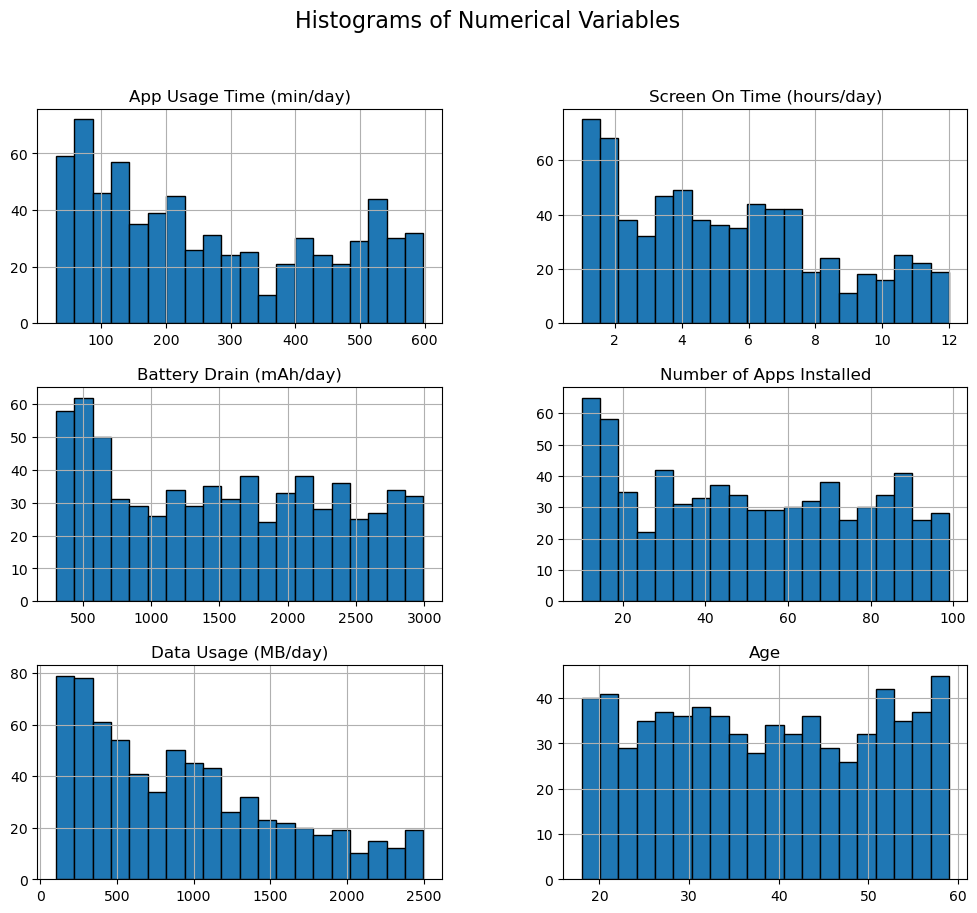

In [30]:
# List of numerical columns for distribution analysis
numerical_columns = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 
                     'Battery Drain (mAh/day)', 'Number of Apps Installed', 
                     'Data Usage (MB/day)', 'Age']

# Create histograms
data[numerical_columns].hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numerical Variables', fontsize=16)
plt.show()

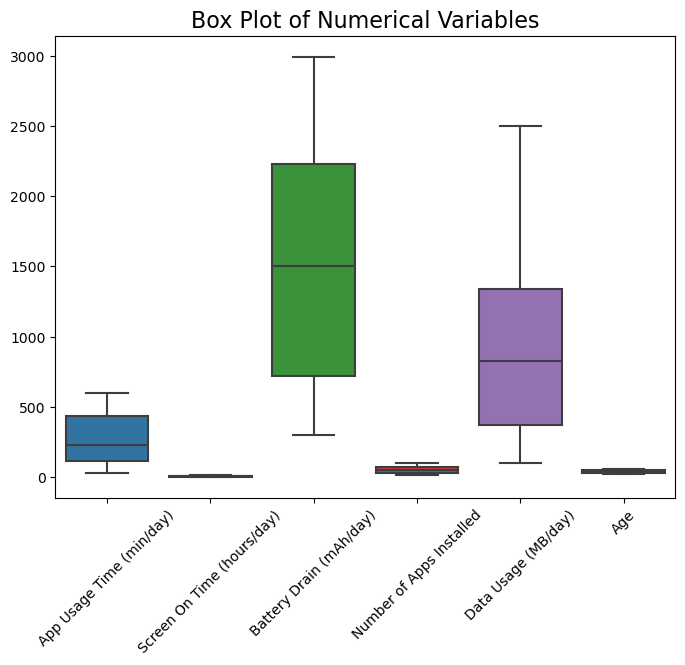

In [36]:
# Create box plots
plt.figure(figsize=(8, 6))
sns.boxplot(data=data[numerical_columns])
plt.title('Box Plot of Numerical Variables', fontsize=16)
plt.xticks(rotation=45)
plt.show()

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

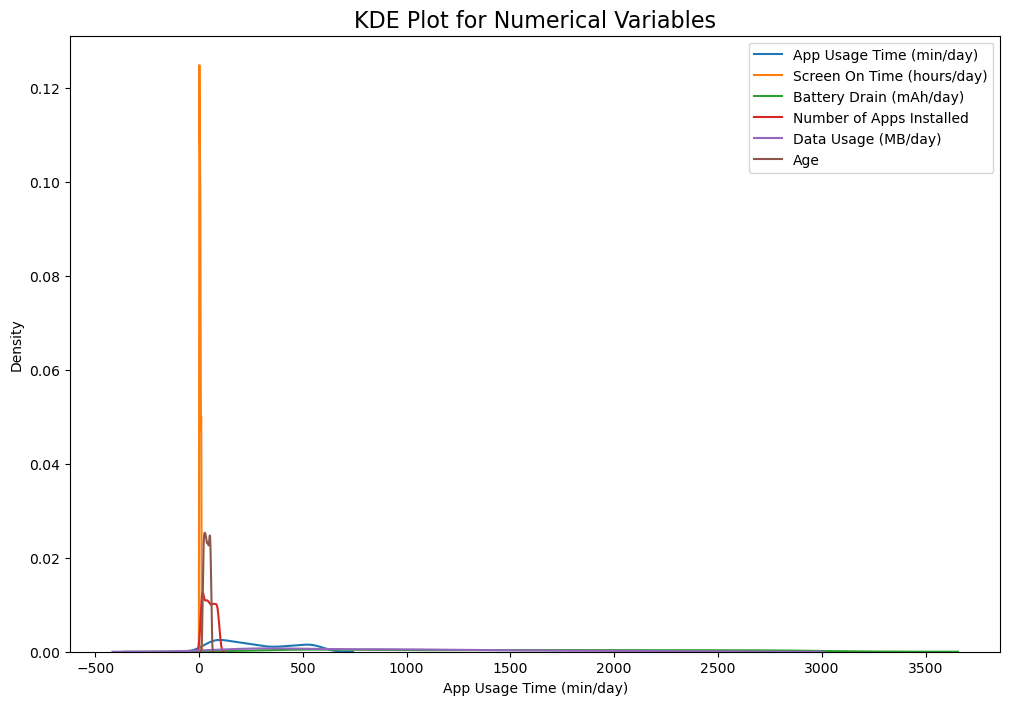

In [38]:
# Kernel Density Estimate (KDE) for continuous variables
plt.figure(figsize=(12, 8))
for col in numerical_columns:
    sns.kdeplot(data[col], label=col)

plt.title('KDE Plot for Numerical Variables', fontsize=16)
plt.legend()
plt.show()


In [42]:
df = pd.get_dummies(data, drop_first=True)

In [48]:
# Define the features (X) and target (y)
X = df.drop('User Behavior Class', axis=1)
y = df['User Behavior Class']

In [50]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [52]:
# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

Confusion Matrix:
[[27  0  0  0  0]
 [ 0 29  0  0  0]
 [ 0  0 34  0  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0 23]]
